###### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('fifa.csv')
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df2 = pd.read_csv('fifa_ variable_information.csv')
df2.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [4]:
df1.shape

(18207, 60)

In [5]:
df1.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

###### 'Value' Amount with Euro symbol as prefix and suffix ‘K’ or
‘M’ indicating thousands and millions respectively.
Convert to Float after getting rid of
currency symbol and suffix.

In [7]:
df1['Value'] = df1['Value'].str.lstrip('€')

In [8]:
df1['Value']

0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Value, Length: 18207, dtype: object

In [9]:
countm = 0
countk = 0
counto = 0
rt = []
for i in range(0,len(df1['Value'])):
    if(df1['Value'][i][-1]=='M'):
        rt.append('million')
    elif(df1['Value'][i][-1]=='K'):
        rt.append('thousand')
    else:
        rt.append('hun')

In [10]:
rt = pd.DataFrame(rt,columns = ['Deno'])

In [11]:
rt['Deno'].unique()

array(['million', 'hun', 'thousand'], dtype=object)

In [12]:
df = pd.concat([df1,rt],axis=1)
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Deno'],
      dtype='object')

In [13]:
df['Value'] = df['Value'].str.rstrip('M')

In [14]:
df['Value'] = df['Value'].str.rstrip('K')

In [15]:
df['Value'] = pd.to_numeric(df['Value'])

In [16]:
for i in range(0,len(df['Value'])):
    if(df['Deno'][i]=='million'):
        df['Value'][i] = df['Value'][i] * 100000
    elif(df['Deno'][i]=='thousand'):
        df['Value'][i] = df['Value'][i] * 1000
    else:
        pass

<ipython-input-16-a75ae8bb9ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'][i] = df['Value'][i] * 100000
<ipython-input-16-a75ae8bb9ce1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'][i] = df['Value'][i] * 1000


In [17]:
df['Value']

0        11050000.0
1         7700000.0
2        11850000.0
3         7200000.0
4        10200000.0
            ...    
18202       60000.0
18203       60000.0
18204       60000.0
18205       60000.0
18206       60000.0
Name: Value, Length: 18207, dtype: float64

In [18]:
df.drop('Deno',axis=1,inplace=True)

###### 'Wage' Amount with Euro symbol as prefix and suffix ‘K’ or
‘M’ indicating thousands and millions respectively.
Convert to Float after getting rid of
currency symbol and suffix.

In [19]:
df['Wage'] = df['Wage'].str.lstrip('€')

In [20]:
ru = []
for i in range(0,len(df['Value'])):
    if(df['Wage'][i][-1]=='M'):
        ru.append('million')
    elif(df['Wage'][i][-1]=='K'):
        ru.append('thousand')
    else:
        ru.append('hun')

In [21]:
ru = pd.DataFrame(ru,columns = ['Deno'])

In [22]:
df = pd.concat([df,ru],axis=1)
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Deno'],
      dtype='object')

In [23]:
df['Wage'] = df['Wage'].str.rstrip('M')

In [24]:
df['Wage'] = df['Wage'].str.rstrip('K')

In [25]:
df['Wage'] = pd.to_numeric(df['Wage'])

In [26]:
for i in range(0,len(df['Value'])):
    if(df['Deno'][i]=='million'):
        df['Wage'][i] = df['Wage'][i] * 100000
    elif(df['Deno'][i]=='thousand'):
        df['Wage'][i] = df['Wage'][i] * 1000
    else:
        pass

<ipython-input-26-a76ce4deeeba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wage'][i] = df['Wage'][i] * 1000


In [27]:
df.drop('Deno',axis=1,inplace=True)

In [28]:
df['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: int64

###### 'Joined' Year as a string, in some cases complete date as string Convert to int with only year

There are null values in Joined column so filling them with forward fill

In [29]:
df['Joined'].fillna(method='ffill',inplace=True)

In [30]:
for i in range(0,len(df['Joined'])):
    df['Joined'][i] = df['Joined'][i][-4:]

<ipython-input-30-bc2d33477119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Joined'][i] = df['Joined'][i][-4:]


In [31]:
df['Joined'] = pd.to_numeric(df['Joined'])

Now the Joined column has only year and has int as datatype

###### 'Contract Valid Until' Date as a string Convert to datetime type

In [32]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [33]:
print(df['Contract Valid Until'].dtype)

datetime64[ns]


Contract Valid Until column data type changed from str to datetime

###### 'Height' In inches with a quotation mark Convert to Float with decimal points

In [34]:
print(df['Height'].dtype)

object


Filling the null values with forward fill

In [35]:
df['Height'].fillna(method='ffill',inplace=True)

Replacing ' with . in the string

In [36]:
for i in range(0,len(df['Height'])):
    df['Height'][i] = df['Height'][i].replace("'",".")

<ipython-input-36-e016fcf75913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'][i] = df['Height'][i].replace("'",".")


changing the datatype from object to int

In [37]:
df['Height'] = pd.to_numeric(df['Height'])

In [38]:
print(df['Height'].dtype)

float64


###### 'Weight' Contains the suffix lbs Remove the suffix and convert to float

we see that weight has prefix with lbs and data type is object

In [39]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [40]:
print(df['Weight'].dtype)

object


using str.rstrip to remove the suffix lbs

In [41]:
df['Weight'] = df['Weight'].str.rstrip('lbs')

In [42]:
df['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: object

Converting the column from object to float

In [43]:
df['Weight'] = pd.to_numeric(df['Weight'])

In [44]:
print(df['Weight'].dtype)

float64


###### 'Release Clause' Amount with Euro symbol as prefix and suffix ‘K’ or
‘M’ indicating thousands and millions respectively.
Convert to Float after getting rid of
currency symbol and suffix.

Applying the same technique as done in wage and value

In [45]:
df['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [46]:
df['Release Clause'] = df['Release Clause'].str.lstrip('€')

In [47]:
df['Release Clause'].fillna(method='ffill',inplace=True)

In [48]:
rc = []
for i in range(0,len(df['Release Clause'])):
    if(df['Release Clause'][i][-1] == 'M'):
        rc.append('million')
    elif(df['Release Clause'][i][-1] == 'K'):
        rc.append('thousand')
    else:
        pass

In [49]:
rc = pd.DataFrame(rc,columns=['Deno'])

In [50]:
df = pd.concat([df,rc],axis=1)

In [51]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Deno'],
      dtype='object')

In [52]:
df['Release Clause'] = df['Release Clause'].str.rstrip('M')

In [53]:
df['Release Clause'] = df['Release Clause'].str.rstrip('K')

In [54]:
df['Release Clause'] = pd.to_numeric(df['Release Clause'])

In [55]:
for i in range(0,len(df['Release Clause'])):
    if(df['Deno'][i]=='million'):
        df['Release Clause'][i] = df['Release Clause'][i] * 100000
    elif(df['Deno'][i]=='thousand'):
        df['Release Clause'][i] = df['Release Clause'][i] * 1000
    else:
        pass

<ipython-input-55-20aa869ee996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release Clause'][i] = df['Release Clause'][i] * 100000
<ipython-input-55-20aa869ee996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release Clause'][i] = df['Release Clause'][i] * 1000


###### 1. Plot the distribution of Overall rating for all players

In [56]:
q1 = df['Overall'].quantile(0.25)
q3 = df['Overall'].quantile(0.75)
mn = df['Overall'].mean()
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

C:\Users\fayiq\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-72-52c41b31085b>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axvline(ul,color='y',Label='Upper Limit')


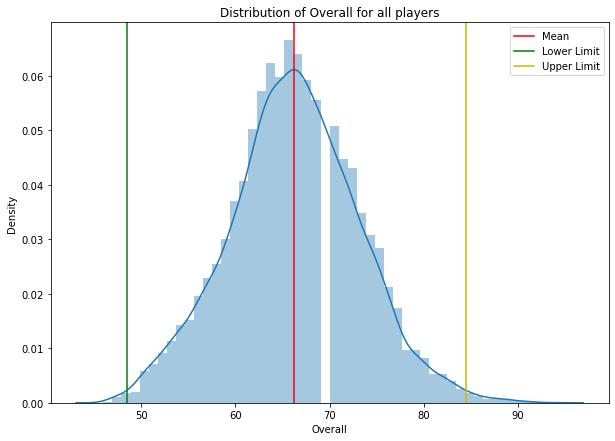

In [72]:
plt.figure(figsize=(10,7))
sns.distplot(df['Overall'])
plt.axvline(mn,color='r',label='Mean')
plt.axvline(ll,color='g',label='Lower Limit')
plt.axvline(ul,color='y',Label='Upper Limit')
plt.title('Distribution of Overall for all players')
plt.legend()
plt.show()

###### 2. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [58]:
df2 = df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]

<Figure size 1080x936 with 0 Axes>

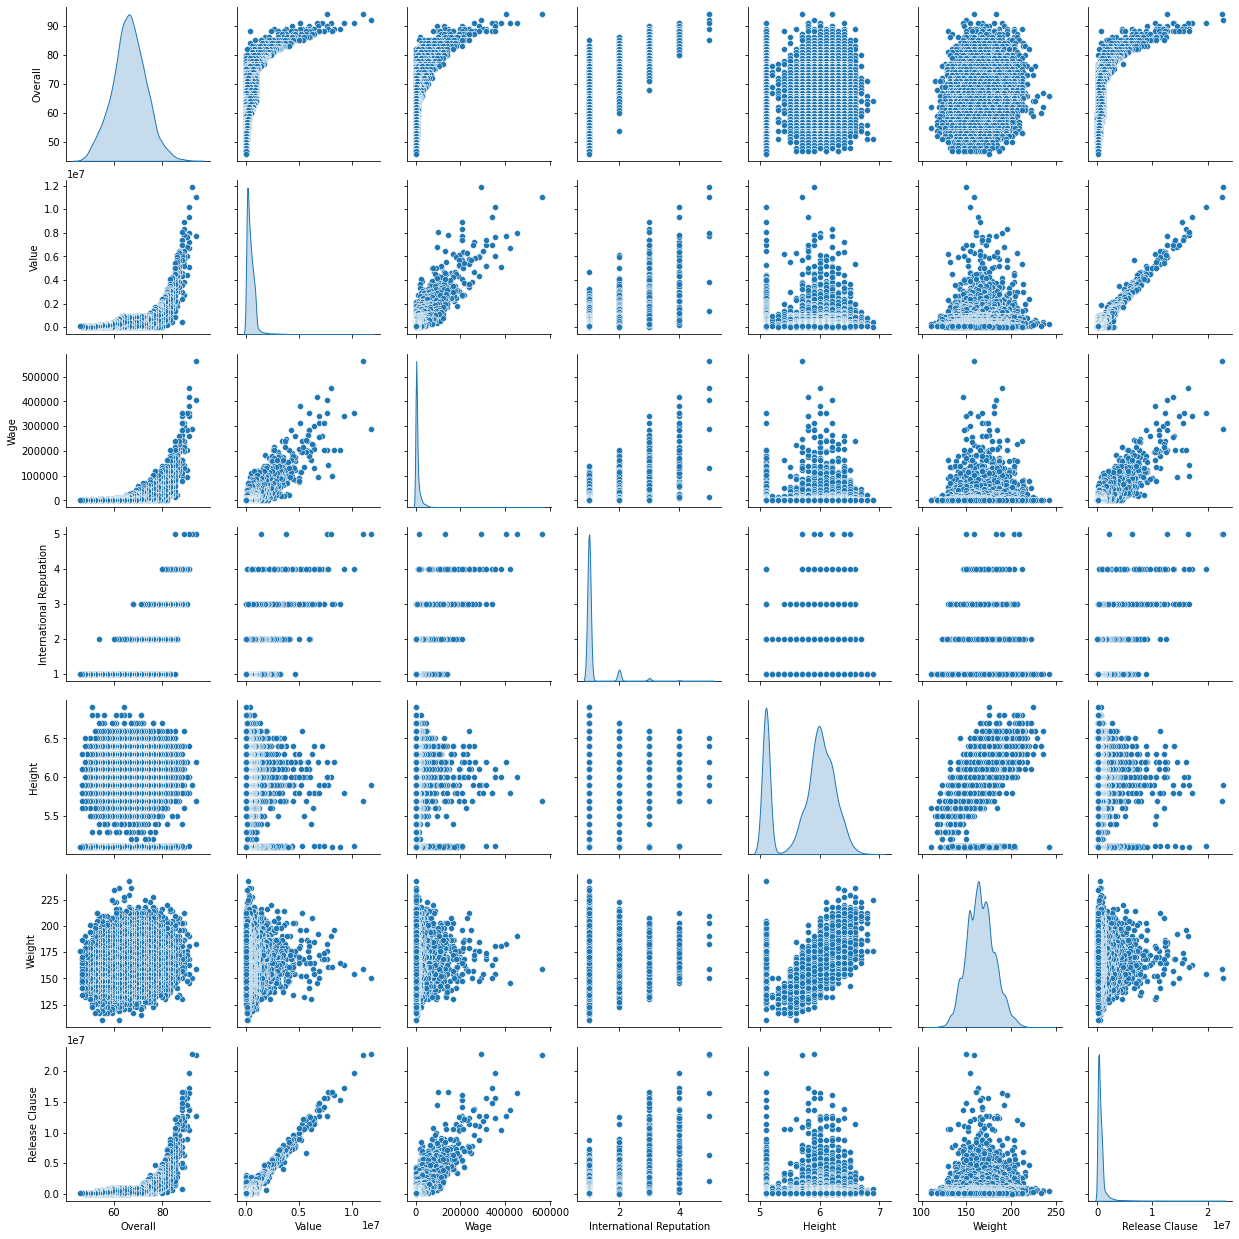

In [59]:
plt.figure(figsize=(15,13))
sns.pairplot(df2,diag_kind = 'kde')
plt.show()

###### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract
expires in 2020.
a) What would the average wage for this set of players be?
b) What is the average age?
c) Is there a correlation between the Overall rating and Value for these players?

sorting the original data frame in descending order of overall (higher the overall better the playerm)

In [60]:
df.sort_values("Overall",axis=0,ascending=False,inplace=True)

From the new sorted data frame gettig only players who's contract expires on 2020

In [61]:
df3 = df[df['Contract Valid Until'] == '2020']
df3.head(20)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Deno
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0,million
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,17210000.0,million
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,13740000.0,million
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,10460000.0,million
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,11100000.0,million
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,4460000.0,million
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,11100000.0,million
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,4440000.0,million
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,14150000.0,million
52,171877,M. Hamšík,30,https://cdn.sofifa.org/players/4/19/171877.png,Slovakia,https://cdn.sofifa.org/flags/43.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,7910000.0,million


The average wage of the top 20 players

In [62]:
avg_wage = np.mean(df['Wage'].head(20))

In [63]:
print('The average wage of the top 20 plyers whos contract expires on 2020 are: ',round(avg_wage,2))

The average wage of the top 20 plyers whos contract expires on 2020 are:  294950.0


In [71]:
avg_age = np.mean(df['Age'].head(20))
print('The average age of the top 20 plyers whos contract expires on 2020 are: ',round(avg_age,2))

The average age of the top 20 plyers whos contract expires on 2020 are:  29.55


C:\Users\fayiq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


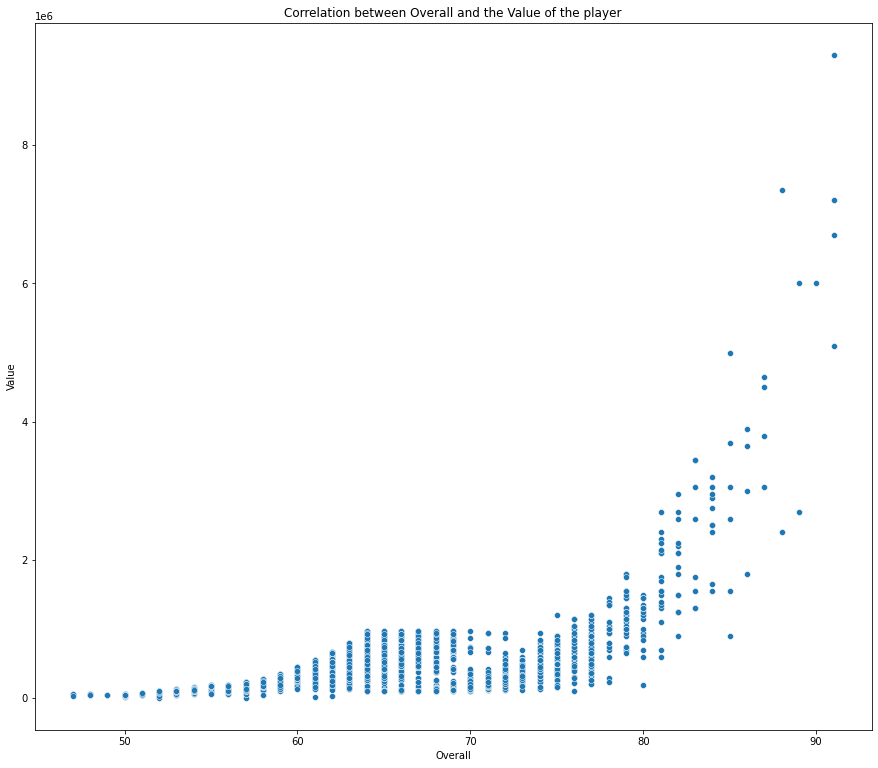

In [64]:
plt.figure(figsize=(15,13))
sns.scatterplot(df3['Overall'],df3['Value'],)
plt.title('Correlation between Overall and the Value of the player')
plt.show()

From the above scatterplot it is seen that as the overall increases the value of the player also increases.

###### 4. Generate tables containing the top 5 players by Overall rating for each unique position.
a) Are there any players appearing in more than one Table. Please point out such players.
b) What is the average wage one can expect to pay for the top 5 in every position?

In [65]:
pos = df3['Position'].unique()
pos

array(['GK', 'LF', 'RCM', 'RCB', 'LCM', 'LCB', 'LS', 'CAM', 'RF', 'LB',
       'CDM', 'CB', 'ST', 'LM', 'RW', 'RM', 'RS', 'CM', 'RAM', 'LDM',
       'RDM', 'RB', 'LW', 'LWB', 'CF', 'RWB', 'LAM'], dtype=object)

In [66]:
df3.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Deno
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0,million
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,17210000.0,million
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,13740000.0,million
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,10460000.0,million
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,11100000.0,million


The index of all the rows are not continuous so resetting the index values

In [67]:
df3 = df3.reset_index()
df3.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Deno
0,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860000.0,million
1,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,17210000.0,million
2,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,13740000.0,million
3,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,10460000.0,million
4,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,11100000.0,million


In [68]:
pos_list = ['df_gk', 'df_lf', 'df_rcm', 'df_rcb', 'df_lcm', 'df_lcb', 'df_ls', 'df_cam', 'df_rf', 'df_lb', 'df_cdm', 'df_cb', 'df_st', 'df_lm', 'df_rw', 'df_rm', 'df_rs', 'df_cm',
'df_ram', 'df_ldm', 'df_rdm', 'df_rb', 'df_lw', 'df_lwb', 'df_cf', 'df_rwb', 'df_lam' ]
pos_list

['df_gk',
 'df_lf',
 'df_rcm',
 'df_rcb',
 'df_lcm',
 'df_lcb',
 'df_ls',
 'df_cam',
 'df_rf',
 'df_lb',
 'df_cdm',
 'df_cb',
 'df_st',
 'df_lm',
 'df_rw',
 'df_rm',
 'df_rs',
 'df_cm',
 'df_ram',
 'df_ldm',
 'df_rdm',
 'df_rb',
 'df_lw',
 'df_lwb',
 'df_cf',
 'df_rwb',
 'df_lam']

In [69]:
def ply_det(posi,dafr):
    dafr = []
    for i in range(0,len(df3['Position'])):
        if(df3['Position'][i]==posi):
            dafr.extend([[df3['Name'][i],df3['Wage'][i]]])

    dafr = pd.DataFrame(dafr,columns=['Name','Wage'])
    mn = dafr['Wage'].head().mean()
    return (dafr.head(), print('\nAverage Wage of top 5 players: ',mn))
    #return print('Average salary of top 5 players: ',dafr['Wage'].head().mean())

In [70]:
for i in range(0,27):
    print('POSITION: ',pos[i])
    print(ply_det(pos[i],pos_list[i]),'\n')

POSITION:  GK

Average Wage of top 5 players:  129600.0
(          Name    Wage
0       De Gea  260000
1     K. Navas  195000
2     A. Lopes   72000
3   D. Subašić   70000
4  S. Mandanda   51000, None) 

POSITION:  LF

Average Wage of top 5 players:  94000.0
(             Name    Wage
0       E. Hazard  340000
1  Jonathan Viera   31000
2   A. Trajkovski    3000
3       H. Ojamaa    2000, None) 

POSITION:  RCM

Average Wage of top 5 players:  144400.0
(            Name    Wage
0      L. Modrić  420000
1         Parejo   66000
2   J. Henderson  125000
3  Pablo Sarabia   26000
4  João Moutinho   85000, None) 

POSITION:  RCB

Average Wage of top 5 players:  159000.0
(              Name    Wage
0     Sergio Ramos  380000
1     Thiago Silva  165000
2  T. Alderweireld  150000
3         E. Garay   44000
4         G. Medel   56000, None) 

POSITION:  LCM

Average Wage of top 5 players:  98600.0
(          Name    Wage
0  David Silva  285000
1    M. Hamšík  125000
2        Oscar   29000
3     

Above output shows the top 5 players in each position